In [2]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils.visu import * 


In [3]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_batch, test_batch = train_X.shape[0], test_X.shape[0]

train_X = train_X.reshape(train_batch, -1)
test_X = test_X.reshape(test_batch, -1)

onehot = np.zeros((train_y.size, 10))
onehot[np.arange(train_y.size), train_y] = 1

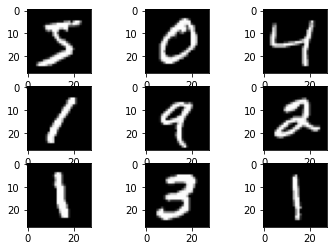

In [5]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    show_mnist(train_X[i])

plt.show()

In [4]:
train_X = train_X.reshape(train_batch, -1)
test_X = test_X.reshape(test_batch, -1)

onehot = np.zeros((train_y.size, 10))
onehot[np.arange(train_y.size), train_y] = 1

In [5]:
mc = MultiClass()
mc.fit(train_X, onehot, hidden=100, nb_iter=100, gradient_step=1e-2)

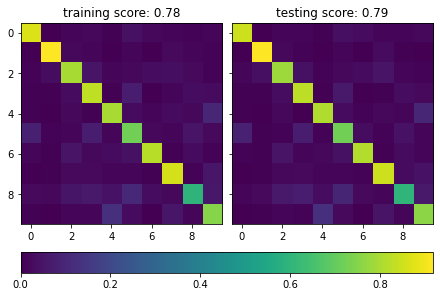

In [6]:
cms, scores = compare_mc_perf(mc, train_X, train_y, test_X, test_y)
plot_perf(cms, scores, "confusion_matrix.png")

In [7]:
mc300 = MultiClass()
mc300.fit(train_X, onehot, hidden=300, nb_iter=100, gradient_step=1e-2)

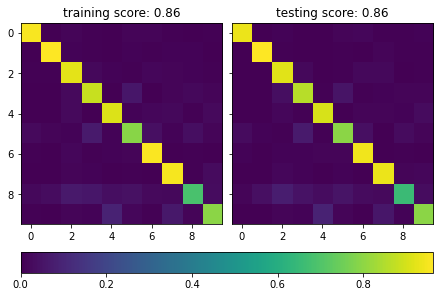

In [8]:
cms300, scores300 = compare_mc_perf(mc300, train_X, train_y, test_X, test_y)
plot_perf(cms300, scores300, "confusion_matrix300.png")

In [9]:
mc_batch = MultiClass()
mc_batch.fit(train_X, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

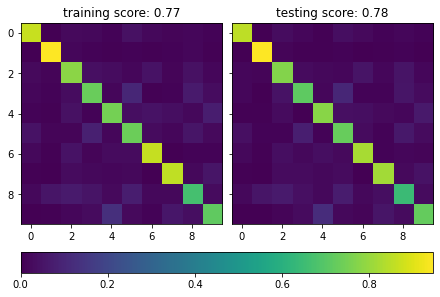

In [10]:
cms_batch, scores_batch = compare_mc_perf(mc_batch, train_X, train_y, test_X, test_y)
plot_perf(cms_batch, scores_batch, "confusion_matrix_batch.png")

In [11]:
mc_batch300 = MultiClass()
mc_batch300.fit(train_X, onehot, hidden=300, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

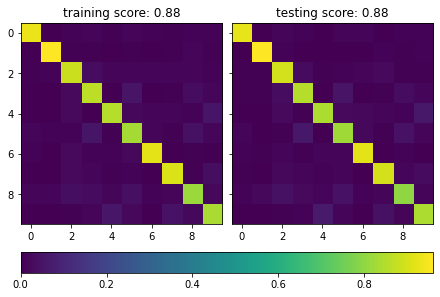

In [12]:
cms_batch300, scores_batch300 = compare_mc_perf(mc_batch300, train_X, train_y, test_X, test_y)
plot_perf(cms_batch300, scores_batch300, "confusion_matrix_batch300.png")